# Machine Learning and Neural Networks Final Project: Predicting Heart Disease Presence From Medical Records.

## Define the problem

The problem with undiagnosed heart conditions is that many individuals are unaware of their presence. Without early medical intervention, many undiagnosed cases unfortunately lead to avoidable deaths. For this project, the main objective is to predict the presence of heart disease in individuals based on a dataset from the 2020 Behavioural Risk Factor Surveillance System (BRFSS) survey, which has been curated and publised on Kaggle. **Please note that the Kaggle webpage provides both 2020 and 2022 datasets. For the purpose of this project, the 2020 dataset is chosen.** [2] [3]

The BRFSS survey, run by the US Centers for Disease Control and Prevention (CDC), obtains annual data on health conditions and risk factors of the US population via phone interviews. The 2020 survey includes data from all 50 states, the District of Columbia, Guam and Puerto Rico, representing a dataset of over 400,000 records. The dataset used in this project had been further processed to emphasise variables that have a more significant impact on heart disease risk, including high blood pressure, high cholesterol, smoking habits, presence of diabetes etc. The preprocessed dataset has over 300,000 datapoints.

The main goal of predicting the presence of heart disease falls under the category of binary classification. The column of "HeartDisease" indicating whether a respondent has had a heart disease (e.g. "Yes" or "No") serves as the label and the aforementioned preprocessed variables as features.

The aim is to accurately identifying the patterns within this dataset that correlate with the presence of heart disease using deep learning techniques. A successful model could enhance the early detection and prevention strategies in healthcare settings.

## Inputs, Outputs and Hypotheses

### Inputs
Out model will use the 17 features from the preprocessed Kaggle dataset as inputs. Specifically, these features are: Body Mass Index (BMI), Smoking status, Alcohol Drinking habits, history of Stroke, Physical Health and Mental Health status, difficulty Walking (DiffWalking), Sex, Age Category, Race, Diabetic status, engagement in Physical Activity, general Health status (GenHealth), average Sleep Time, and history of Asthma, Kidney Disease, and Skin Cancer.

### Outputs
The output is the binary classification of heart disease presence, where "Yes" indicates the respondent has experienced heart disease and "No" indicates otherwise.

### Hypotheses:

We hypothesise that the inputs have enough statistical power to detect the presence of heart disease and thus can help detect at-risk patients. More specifically, we want the model to be able to detect the vast majority of respondents with a presence of heart disease, meaning that the recall rate as a measurement is of particular importance.

### Use case
If proven effective, the trained model could sift through vast medical records to pinpoint undiagnosed patients at high risk of heart conditions. This could revolutionise early detection and prevention and help save lives.

##Measure of success

###Recall and Precision rates
Given the importance of correctly detecting as many high-risk individuals as possible, the recall rate is the primary measure of success. A high recall rate ensures that the vast majority of real positive cases are captured, which minimises the chance of missing undiagnosed individuals who are at risk of heart disease.

To maintain a balanced perspective, precision rate is also considered. Accuracy in this context is not relevant as the dataset is highly imbalanced (explained more below), with only around 8.5% of datapoints are positives. This means that if the model were to naively predict all datapoints as 0's, this would give an accuracy of around 92%, which would be false. Hence, accuracy is **not considered** in this project.

Precision, the percentage of true positive predictions in all positive predictions, is a relevant measurement. A high precision rate ensures that the individuals that the model identifies has high risk are indeed likely to have a heart condition. This is because a high number of false positives would increase the anxiety of the patients and involve unnecessary medical evaluations.

### Loss function
We have chosen binary cossentropy as our loss function, which is suited for binary classification problems. Our model is compiled with an SGD optimiser and is evaluated using metrics that include accuracy, recall and precision.

## Evaluation protocol
With our dataset of over 300,000 data points, we've determined that using a hold-out validation set is the most optimal evaluation protocol for our model. We plan to allocate 80% of the dataset for training purposes, with the remaining 20% reserved for final testing. Within the training segment, we will further divide the data, allocating 80% for initial training and 20% for validation. This division allows us to fine tune our model's hyperparameters to achieve the most optimal settings. After identifying the most suitable hyperparameters, we will merge the initial training and validation sets to re-train the model using these optimised settings. The separate testing set, constituting the final 20% of the data, will then serve to evaluate our model's prediction performance, ensuring we have a clear understanding of its effectiveness in real world scenarios.












## Data Preparation

Let's begin by importing the 2020 dataset. We will then shuffle the dataset so that the dataset is more balanced:

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/heart_2020_cleaned.csv')

#shuffle the dataset
df = df.sample(frac=1, random_state=42)

#set the option to display all columns, None means no limith
pd.set_option('display.max_columns', None)

df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
271884,No,27.63,Yes,No,No,0.0,25.0,No,Female,25-29,Hispanic,No,Yes,Very good,7.0,No,No,No
270361,No,21.95,No,No,No,0.0,20.0,No,Female,30-34,White,No,Yes,Excellent,6.0,No,No,Yes
219060,No,31.32,Yes,No,No,0.0,0.0,No,Female,40-44,White,No,Yes,Very good,6.0,Yes,No,No
24010,No,40.35,No,No,No,30.0,0.0,No,Female,65-69,White,No,No,Good,8.0,No,No,No
181930,No,35.61,Yes,No,No,30.0,30.0,Yes,Female,60-64,White,No,No,Fair,4.0,Yes,No,Yes


As the features are not in a form that can be processed by the machine learning algorithm, we need to encode them. To prepare out data for modelling, we implemented an encoding function to transform these categorical and orginal variables into a suitable format. The function begins by encoding binary features, namely Smoking, Alcohol Drinking, Stroke, Difficulty Walking, Diabetic status, Physical Activity, Asthma, Kidney Disease and Cancer by mapping "Yes" to 1 and "No" to 0.

For the "Sex" variable, a binary encoding is applied, mapping "Male" to 1 and "Female" to 0.

Ordinal encoding is utilised for GenHealth and AgeCategory features to reflect their order. "GenHealth" is encoded based on health status, ranging from Poor (0) to "Excellent" (4), while AgeCategory is mapped to a sequence starting from 18-24(0) to 80 or Older (12), which captures the progression through age groups.

The Race feature is transformed into one-hot encoding to create binary columns for each cateogyr/ This ensures that our model can interpret these non-ordinal data without implying order.

In [2]:
def encode_features(table):

    encoded_table = table.copy()

    #encode binary value columns
    binary_col = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke',
                  'DiffWalking', 'Diabetic', 'PhysicalActivity', 'Asthma',
                  'KidneyDisease', 'SkinCancer']

    #mapping yes or no to 1/0 for specified columns
    for col in binary_col:
        encoded_table[col] = encoded_table[col].map({'Yes': 1, 'No': 0})

    #mapping gender
    encoded_table['Sex'] = encoded_table['Sex'].map({'Male': 1, 'Female': 0})

    #ordinal encoding for GenHealth
    gen_health_mapping = {
        'Poor': 0.,
        'Fair': 1.,
        'Good': 2.,
        'Very good': 3.,
        'Excellent': 4.,
    }

    encoded_table['GenHealth'] = encoded_table['GenHealth'].map(gen_health_mapping)

    #ordinal encoding for AgeCategory
    age_mapping = {
        '18-24': 0.,
        '25-29': 1.,
        '30-34': 2.,
        '35-39': 3.,
        '40-44': 4.,
        '45-49': 5.,
        '50-54': 6.,
        '55-59': 7.,
        '60-64': 8.,
        '65-69': 9.,
        '70-74': 10.,
        '75-79': 11.,
        '80 or older': 12.
    }

    encoded_table['AgeCategory'] = encoded_table['AgeCategory'].map(age_mapping)

    #encode categorical value columns
    encoded_table = pd.get_dummies(encoded_table, columns=['Race'])

    return encoded_table

encoded_df = encode_features(df)
encoded_df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
271884,0,27.63,1,0,0,0.0,25.0,0,0,1.0,0.0,1,3.0,7.0,0,0,0,0,0,0,1,0,0
270361,0,21.95,0,0,0,0.0,20.0,0,0,2.0,0.0,1,4.0,6.0,0,0,1,0,0,0,0,0,1
219060,0,31.32,1,0,0,0.0,0.0,0,0,4.0,0.0,1,3.0,6.0,1,0,0,0,0,0,0,0,1
24010,0,40.35,0,0,0,30.0,0.0,0,0,9.0,0.0,0,2.0,8.0,0,0,0,0,0,0,0,0,1
181930,0,35.61,1,0,0,30.0,30.0,1,0,8.0,0.0,0,1.0,4.0,1,0,1,0,0,0,0,0,1


After encoding, we need to ensure that the relevant columns are not too highly skewed, which could distort our model. Highly skewed columns need to be corrected with a log function. [7] Then, we normalise certain features, namely BMI, PhysicalHealth, MentalHealth, SleepTime, GenHealth and AgeCategory by subtracting the mean and dividing by the standard deciation. This step is crucial as it scales the data to a standard range in order to reduce the sensitivity to the magnitude of values, especially during gradient descent. By ensuring all features contribute equally to the model's algorithm, we need to prevent any one feature from disproportionately influencing the model's performance due to scale.

In [3]:
from scipy.stats import skew


# skewness = skew(df['PhysicalHealth'])
# skewness

for col in encoded_df.columns:
    skewness = skew(encoded_df[col])
    print(f"Skewness for {col}: {skewness}")

Skewness for HeartDisease: 2.962510851115938
Skewness for BMI: 1.3324243931174087
Skewness for Smoking: 0.35558317399512934
Skewness for AlcoholDrinking: 3.4290029916894125
Skewness for Stroke: 4.851437338465762
Skewness for PhysicalHealth: 2.6039610482829403
Skewness for MentalHealth: 2.3311006150318803
Skewness for DiffWalking: 2.0885960328153232
Skewness for Sex: 0.09902828096492025
Skewness for AgeCategory: -0.26360963242463975
Skewness for Diabetic: nan
Skewness for PhysicalActivity: -1.3195957489859749
Skewness for GenHealth: -0.45395972291181264
Skewness for SleepTime: 0.6790314357818192
Skewness for Asthma: 2.148048659158537
Skewness for KidneyDisease: 4.91811241943461
Skewness for SkinCancer: 2.7977438579025247
Skewness for Race_American Indian/Alaskan Native: 7.648001682140592
Skewness for Race_Asian: 6.055025866131191
Skewness for Race_Black: 3.319394195468926
Skewness for Race_Hispanic: 2.9573078823642285
Skewness for Race_Other: 5.1282744310766555
Skewness for Race_White: 

The only relevant columns are PhysicalHealth, MentalHealth and BMI. The rest of the features are either categorical or Yes/No binary columns, which are not features that need to be corrected for their skewness. We chose 1.5 as the threshold for implementing skewness correction so that only the most badly skewed are corrected. Since two relevant columns, namely PhysicalHealth and MentalHealth have skewness values of in excess of 1.5 or -1.5, this suggests that they are highly skewed. We thus correct the skewness of the relevant columns by applying the log function within the normalise function. [6]

In [4]:
def normalise(table):

    #correct the skewness for high skewness columns apart from categorical and Yes/No columns
    table['PhysicalHealth'] = np.log1p(table['PhysicalHealth'])
    table['MentalHealth'] = np.log1p(table['MentalHealth'])
    # table['BMI'] = np.log1p(table['BMI'])

    # print(skew(table['PhysicalHealth']))

    normalise_cols = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime', 'GenHealth', 'AgeCategory']


    for col in normalise_cols:

        mean = table[col].mean(axis=0)
        table[col] -= mean
        std = table[col].std(axis=0)
        table[col] /= std



    return table

encoded_df = normalise(encoded_df)
encoded_df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
271884,0,-0.109406,1,0,0,-0.561911,2.201605,0,0,-1.546959,0.0,1,0.388307,-0.067600,0,0,0,0,0,0,1,0,0
270361,0,-1.003036,0,0,0,-0.561911,2.014021,0,0,-1.266435,0.0,1,1.347155,-0.763976,0,0,1,0,0,0,0,0,1
219060,0,0.471138,1,0,0,-0.561911,-0.660016,0,0,-0.705387,0.0,1,0.388307,-0.763976,1,0,0,0,0,0,0,0,1
24010,0,1.891821,0,0,0,2.602409,-0.660016,0,0,0.697232,0.0,0,-0.570542,0.628775,0,0,0,0,0,0,0,0,1
181930,0,1.146080,1,0,0,2.602409,2.356092,1,0,0.416708,0.0,0,-1.529390,-2.156727,1,0,1,0,0,0,0,0,1


After being encoded and normalised, we need to check to see if there are any null values in the dataset. If so, the associated rows will be deleted, provided that the number of rows with missing values is manageable:

In [5]:
print(encoded_df.isnull().sum())

HeartDisease                              0
BMI                                       0
Smoking                                   0
AlcoholDrinking                           0
Stroke                                    0
PhysicalHealth                            0
MentalHealth                              0
DiffWalking                               0
Sex                                       0
AgeCategory                               0
Diabetic                               9340
PhysicalActivity                          0
GenHealth                                 0
SleepTime                                 0
Asthma                                    0
KidneyDisease                             0
SkinCancer                                0
Race_American Indian/Alaskan Native       0
Race_Asian                                0
Race_Black                                0
Race_Hispanic                             0
Race_Other                                0
Race_White                      

The number of null values in the Diabetic column is 9340, a small percentage of the overall dataset. Since this number is manageable, we will proceed to deleting these rows:

In [6]:

encoded_df = encoded_df.dropna(subset=['Diabetic'])
print(encoded_df['Diabetic'].isnull().sum())



0


In [7]:
heart_disease_rows = encoded_df[encoded_df['HeartDisease'] == 1]
len(heart_disease_rows)

26476

In order to train and test our model, we divided the preprocessed dataset into training and testing sets using an 80:20 split ratio. This resulted in the majority of the data, 80%, being allocated for training (all_train), and the remaining 20% set aside for testing (all_test).

Then, we split the all_train dataset into partial training (all_partial) and validation (all_val) sets using another 80:20 split. This ensures proper splits for hyperparameter tuning and validation, allowing for evaluation before final testing.

The dataset shows a huge imbalance, with only around 8.5% of the data in each segment representing individuals with heart disease. Such imbalance is a challenge as it can lead to model bias towards the majority class, affecting the training of the model.

To resolve this imbalance and improve model performance, we implemented a function to oversample the minority class (HeartDisease == 1) in only the partial training set by duplicating these records 9 times. This method aims to get the all_partial set to a more balanced 50:50 ratio, enhancing the model's ability to learn from an equal representation of both classes. [5]

It is crucial to stress that oversampling was performed on only the all_partial dataset segment to maintain the integrity of the unseen data and to prevent any data leakage. This approach is important for the reliability of our evaluation and the overall effectiveness of the predictive model, which is evaluated against the validation and final test data.

In [8]:
#function to oversample
def oversample(dataset_df):
  heart_disease_df = dataset_df[dataset_df['HeartDisease'] == 1]

  #duplicate these rows 9 times
  duplicated_rows = pd.concat([heart_disease_df]*9, ignore_index=True)

  #combine the original dataframe with the duplicated rows
  df_combined = pd.concat([dataset_df, duplicated_rows], ignore_index=True)

  #shuffle the combined DataFrame
  dataset_df = df_combined.sample(frac=1, random_state=42).reset_index(drop=True)

  return dataset_df


In [9]:
#separate the data for training and testing

#test train split ratio
train_split_ratio = int(len(encoded_df)*0.8)

#split encoded_df to all_train and all_test
all_train = encoded_df[:train_split_ratio]
all_test = encoded_df[train_split_ratio:]

#keeping the original all_test just for testing. might delete later.
all_test_original = encoded_df[train_split_ratio:]

#partial train and val split ratio
partial_split_ratio = int(len(all_train)*0.8)

#split all_train to all_partial and all_val
all_partial = all_train[:partial_split_ratio]
all_val = all_train[partial_split_ratio:]


#Before oversampling percentages:
#formatting the calculation of the proportion of `1` in y_partial as a percentage
percentage = (all_partial['HeartDisease'] == 1).sum() / len(all_partial) * 100
print(f"Before oversample Percentage of HeartDisease == `1` in all_partial: {percentage:.2f}%")

#formatting the calculation of the proportion of `1` in all_val as a percentage
percentage = (all_val['HeartDisease'] == 1).sum() / len(all_val) * 100
print(f"Before oversample Percentage of HeartDisease == `1` in all_val: {percentage:.2f}%")

#formatting the calculation of the proportion of `1` in all_val as a percentage
percentage = (all_test['HeartDisease'] == 1).sum() / len(all_test) * 100
print(f"Before oversample Percentage of HeartDisease == `1` in all_test: {percentage:.2f}%")


#oversample all_partial
all_partial = oversample(all_partial)

# #oversample the all_val
# all_val = oversample(all_val)

# #oversample the general test set
# all_test = oversample(all_test)

#After oversampling percentages
#formatting the calculation of the proportion of `1` in y_partial as a percentage
percentage = (all_partial['HeartDisease'] == 1).sum() / len(all_partial) * 100
print(f"After oversample Percentage of HeartDisease == `1` in all_partial: {percentage:.2f}%")

#formatting the calculation of the proportion of `1` in all_val as a percentage
percentage = (all_val['HeartDisease'] == 1).sum() / len(all_val) * 100
print(f"After oversample Percentage of HeartDisease == `1` in all_val: {percentage:.2f}%")

#formatting the calculation of the proportion of `1` in all_val as a percentage
percentage = (all_test['HeartDisease'] == 1).sum() / len(all_test) * 100
print(f"After oversample Percentage of HeartDisease == `1` in all_test: {percentage:.2f}%")

Before oversample Percentage of HeartDisease == `1` in all_partial: 8.57%
Before oversample Percentage of HeartDisease == `1` in all_val: 8.39%
Before oversample Percentage of HeartDisease == `1` in all_test: 8.49%
After oversample Percentage of HeartDisease == `1` in all_partial: 48.40%
After oversample Percentage of HeartDisease == `1` in all_val: 8.39%
After oversample Percentage of HeartDisease == `1` in all_test: 8.49%


In [10]:
#double check the lengths of each data segments to see everything looks correct.
#overall training dataset
y_train = all_train['HeartDisease']
x_train = all_train.drop(columns=['HeartDisease'])

#test training dataset
y_test = all_test['HeartDisease']
x_test = all_test.drop(columns=['HeartDisease'])

#partial train and val
y_partial = all_partial['HeartDisease']
x_partial = all_partial.drop(columns=['HeartDisease'])

y_val = all_val['HeartDisease']
x_val = all_val.drop(columns=['HeartDisease'])

#printing the sizes of the train, test, partial and validation datasets
print("Train:")
print(f"Length of x_train: {len(x_train)}")
print(f"Length of y_train: {len(y_train)}\n")

print("Test:")
print(f"Length of x_test: {len(x_test)}")
print(f"Length of y_test: {len(y_test)}\n")

print("Partial:")
print(f"Length of x_partial: {len(x_partial)}")
print(f"Length of y_partial: {len(y_partial)}\n")

print("Validation (Val):")
print(f"Length of x_val: {len(x_val)}")
print(f"Length of y_val: {len(y_val)}\n")



Train:
Length of x_train: 248364
Length of y_train: 248364

Test:
Length of x_test: 62091
Length of y_test: 62091

Partial:
Length of x_partial: 352015
Length of y_partial: 352015

Validation (Val):
Length of x_val: 49673
Length of y_val: 49673



In [11]:
x_partial.iloc[[0]]

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
0,0.962005,0,0,0,-0.561911,2.356092,0,1,0.416708,0.0,1,-0.570542,0.628775,0,0,0,0,0,0,0,0,1


In [12]:
y_partial.iloc[[0]]

0    1
Name: HeartDisease, dtype: int64

# Developing the model

We use a dense layer with 100 neurons and the relu activation function as the first layer. This layer takes input with 22 features, which match our dataset's characteristics. After this, we added a dropout layer with a rate of 0.3. 

We repeat this pattern three more times by adding a dense layer with 100 neurons and relu activation followed by a dropout layer. This structure helps the model learn complex patterns in the data by adding more depth while preventing overfitting with dropout.

For the final layer, we use a dense layer with 1 neuron and a sigmoid activation function. The sigmoid function outputs a value between 0 and 1, making it suitable for our binary classification task.

To train the model, we chose the Stochastic Gradient Descent (SGD) optimiser with a learning rate of 0.001 and a momentum of 0.9. 

We compiled the model with the binary crossentropy loss function, which is commonly used for binary classification tasks. 

When training the model, we used a batch size of 1500, which means the model updates its weights after looking at 1500 examples. 

# Experiments

While developing the model, we experimented with hyperparameters to optimise the model's architecture and training process. These experiments were key to finding the sweet spot for each parameter, balancing model performance with computational efficiency.

Our experiments included a variety of learning rates for both the Stochastic Gradient Descent (SGD) and Adam optimizers. By adjusting the learning rates, we aimed to find a balance where the model could converge without sacrificing performance or speed.

Batch size was another crucial variable. We tested sizes from 500 to 5500 and identified 1500 as the optimal batch size. This size provided the best compromise, offering a good gradient estimation that avoids the distortions of too-small or too-large sizes. This improves the model’s ability to generalise from training data effectively.

Initially, to tackle overfitting, which is a common issue where models learn the training data too well but perform poorly on unseen data, we experimented with dropout and regularisation techniques (L1 and L2). However, we observed that a higher dropout rate or the inclusion of L1/L2 regularisation made the model underfit, which caused the validation loss to remain in the 0.50s. This indicated that the model is struggling to learn the complex patterns within our dataset. Similar outcomes were noted when we reduced the number of layers, decreased neuron units, or increased the optimiser's learning rate. These prevented the model from capturing the dataset's complex patterns.

It became clear that the model needed to be strengthened. We increased the neuron count in each layer and added more layers while removing L1/L2 regularisation. This approach, coupled with reducing the batch size to 1500, even after trying for sizes up to 5500, proved effective. These adjustments led to a significant decrease in validation loss to the lower 0.40s and even the 0.30s, signalling an improved fit. Notably, achieving a validation loss lower than the training loss, especially after these modifications, highlighted our model's ability to generalise and maintain strong recall rates on unseen, non-oversampled data. **It’s important to remember that we only oversampled the partial training sets.**

To resolve the dataset's imbalance, we initially considered using class weights to adjust the learning process in favour of the minority class. However, this strategy reduced precision even further while increasing validation loss. We then chose to oversample the minority class in the training data, instead, which proved to be an effective strategy for addressing class imbalance.

Throughout this development phase, adjusting learning rates, batch sizes, layers, and neuron units, while strategically implementing dropout, class weights and oversampling, we refined our model. This process helped to improve the model's performance. 

In [13]:
#Code taken from [1]

#build the model
from tensorflow.keras import models
from tensorflow.keras import layers, regularizers
from tensorflow.keras.metrics import Recall, Precision
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

def train_model(_epochs, X, Y, X_val=None, Y_val=None):
    #initialise
    model = models.Sequential()

    #add layers
    model.add(layers.Dense(100, activation = 'relu', input_shape = (22,)))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(100, activation = 'relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(100, activation = 'relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(100, activation = 'relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(1, activation = 'sigmoid'))


    #chose sgd optimiser with the specific learning rate and momentum
    # sgd_optimizer = SGD(learning_rate=0.0001, momentum=0.9)
    sgd_optimizer = SGD(learning_rate=0.001, momentum=0.9)

    # adam_optimizer = Adam(learning_rate=0.001)

    model.compile(optimizer=sgd_optimizer,
                loss='binary_crossentropy',
                  # loss='mean_squared_error',
                metrics=['accuracy', Recall(), Precision()])


    if X_val is None or Y_val is None:
      history = model.fit(X,
                        Y,
                        epochs=_epochs,
                        batch_size=1500,)
    else:
      history = model.fit(X,
                        Y,
                        epochs=_epochs,
                        batch_size=1500,
                        validation_data=(X_val, Y_val),)

    return model, history


In [14]:
#train the model

initial_model, initial_history = train_model(500, x_partial, y_partial, x_val, y_val)




Epoch 1/500
235/235 [==============================] - 5s 6ms/step - loss: 0.6852 - accuracy: 0.5488 - recall: 0.5544 - precision: 0.5325 - val_loss: 0.6731 - val_accuracy: 0.6893 - val_recall: 0.7078 - val_precision: 0.1719
Epoch 2/500
235/235 [==============================] - 1s 5ms/step - loss: 0.6563 - accuracy: 0.6331 - recall: 0.6425 - precision: 0.6159 - val_loss: 0.6401 - val_accuracy: 0.7175 - val_recall: 0.7165 - val_precision: 0.1886
Epoch 3/500
235/235 [==============================] - 1s 5ms/step - loss: 0.6208 - accuracy: 0.6815 - recall: 0.6649 - precision: 0.6731 - val_loss: 0.5964 - val_accuracy: 0.7246 - val_recall: 0.7321 - val_precision: 0.1955
Epoch 4/500
235/235 [==============================] - 1s 5ms/step - loss: 0.5902 - accuracy: 0.7052 - recall: 0.6818 - precision: 0.7010 - val_loss: 0.5607 - val_accuracy: 0.7242 - val_recall: 0.7580 - val_precision: 0.1994
Epoch 5/500
235/235 [==============================] - 1s 5ms/step - loss: 0.5706 - accuracy: 0.7160

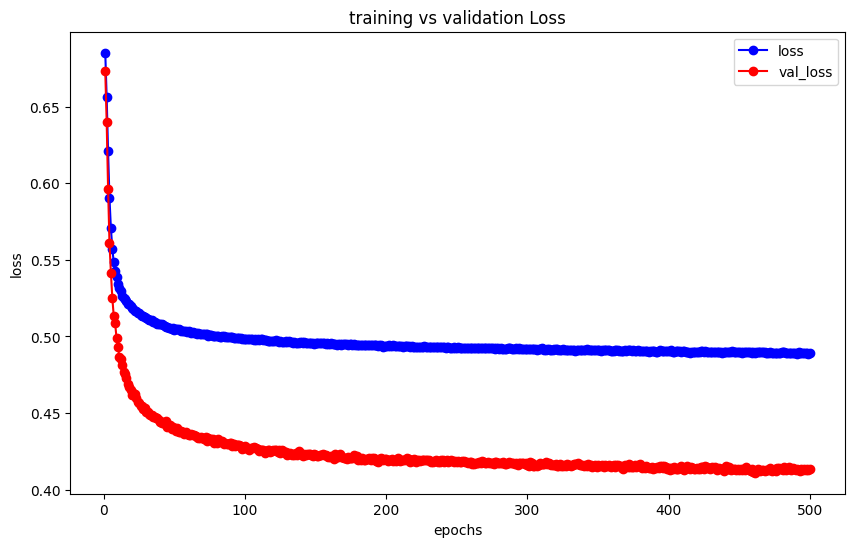

In [18]:
#plot the graph
import matplotlib.pyplot as plt

loss = initial_history.history['loss']
val_loss = initial_history.history['val_loss']
epochs = range(1, len(loss) + 1)


plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, 'bo-', label='loss')
plt.plot(epochs, val_loss, 'ro-', label='val_loss')
plt.title('training vs validation Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.show()

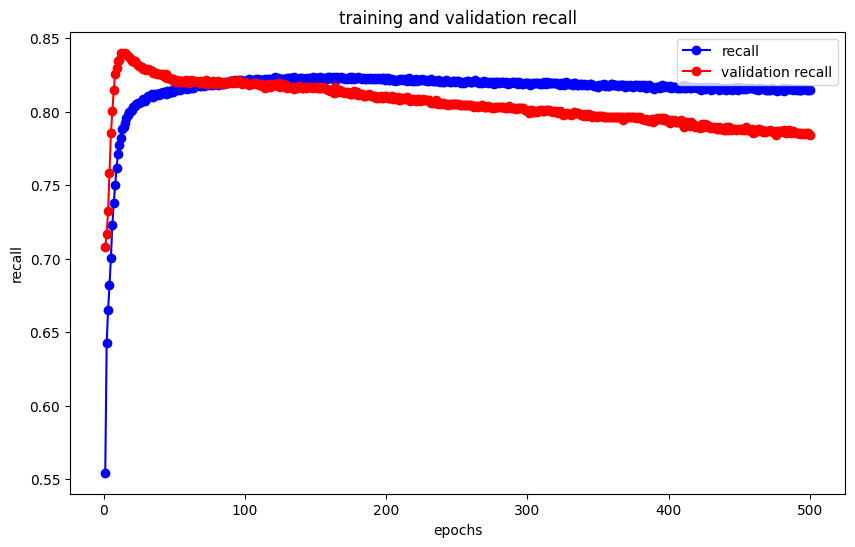

In [19]:

recall = initial_history.history['recall']
val_recall = initial_history.history['val_recall']
epochs = range(1, len(recall) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, recall, 'bo-', label='recall')
plt.plot(epochs, val_recall, 'ro-', label='validation recall')
plt.title('training and validation recall')
plt.xlabel('epochs')
plt.ylabel('recall')
plt.legend()

plt.show()


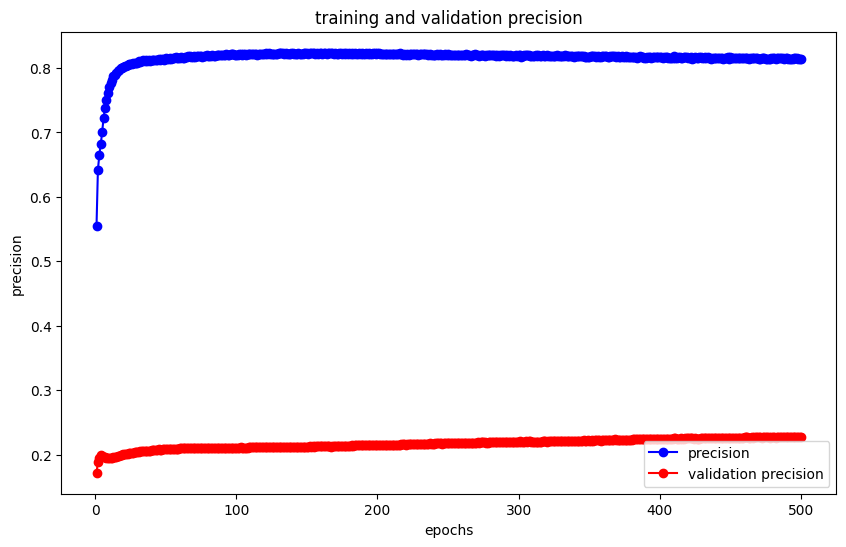

In [20]:
ecall = initial_history.history['precision']
val_recall = initial_history.history['val_precision']
epochs = range(1, len(recall) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, recall, 'bo-', label='precision')
plt.plot(epochs, val_recall, 'ro-', label='validation precision')
plt.title('training and validation precision')
plt.xlabel('epochs')
plt.ylabel('precision')
plt.legend()

plt.show()

Since validation loss fell to 0.41 and began to plateau at around that level at roughly the epochs=300 mark, we will use this to train our final model. It is interesting to observe that while the validation loss continues to very gradually fall after the epochs=300 mark, the validation recall rate began to decrease slightly. This is possibly due to the model trying to balance out between the recall and precision rates or trying to obtain fewer false positives, while maintaining a sufficiently high recall rate. The validation precision is significantly lower than the training precision rate, which is largely due to the fact that the training set is oversampled, while the validation set remains hugely imbalanced.

With the most optimal hyperparameters obtained from our experiments, we can now begin to train the final model:

In [21]:
#now combine the partial and val datasets and train for the final model

x_combined = pd.concat([x_partial, x_val])
y_combined = pd.concat([y_partial, y_val])

final_model, final_history = train_model(300, x_combined, y_combined)


Epoch 1/300
268/268 [==============================] - 2s 4ms/step - loss: 0.6786 - accuracy: 0.5758 - recall_1: 0.4304 - precision_1: 0.5141
Epoch 2/300
268/268 [==============================] - 1s 4ms/step - loss: 0.6354 - accuracy: 0.6587 - recall_1: 0.4607 - precision_1: 0.6518
Epoch 3/300
268/268 [==============================] - 1s 4ms/step - loss: 0.5902 - accuracy: 0.6967 - recall_1: 0.5726 - precision_1: 0.6791
Epoch 4/300
268/268 [==============================] - 1s 4ms/step - loss: 0.5610 - accuracy: 0.7156 - recall_1: 0.6368 - precision_1: 0.6862
Epoch 5/300
268/268 [==============================] - 1s 4ms/step - loss: 0.5475 - accuracy: 0.7235 - recall_1: 0.6656 - precision_1: 0.6879
Epoch 6/300
268/268 [==============================] - 1s 4ms/step - loss: 0.5389 - accuracy: 0.7300 - recall_1: 0.6895 - precision_1: 0.6892
Epoch 7/300
268/268 [==============================] - 1s 4ms/step - loss: 0.5337 - accuracy: 0.7335 - recall_1: 0.7008 - precision_1: 0.6904
Epoch 

In [27]:
final_model.evaluate(x_test, y_test)


1941/1941 [==============================] - 4s 2ms/step - loss: 0.3806 - accuracy: 0.7713 - recall_1: 0.7611 - precision_1: 0.2367


[0.3806227743625641,
 0.7713356018066406,
 0.7611458897590637,
 0.2366822063922882]

# Results

The final model achieved a recall of 0.76. This means it is sufficiently good at finding the true cases of heart disease. It correctly identified 76% of the people who actually have heart disease. This is significantly better than just guessing 'no' for all individuals, the baseline recall rate, which would miss all true cases of heart disease.

Due to the hugely imbalanced dataset, the accuracy rate is irrelevant.

The model's precision is around 0.24. This means that when the model predicts heart disease, it is correct about 24% of the time. While this might seem low, in a situation like heart disease detection, it is more important to ensure that the model finds as many true cases as possible, even if it means obtaining more false alarms. This is because missing a true case could have serious consequences.

Statistical power, in this context, means how good the model is at finding the cases of heart disease among many non-cases. A high recall indicates that the model has strong statistical power because it is able to detect the relatively rare 'yes' cases effectively.

# Discussion


Precision measures the proportion of true positive predictions in all positive predictions made by the model. Given the imbalance of 'no' cases, the model is challenged by a much smaller pool of 'yes' instances to learn from, making every prediction of heart disease more prone to error simply due to the rarity of positive cases. Hence, a lower precision should be interpreted with the understanding that the model operates under the constraint of limited positive examples.

In the context of heart disease detection, the priority is to minimise the number of undiagnosed individuals. The model's higher recall (0.78) demonstrates its effectiveness in identifying a large portion of true positive cases. Missing a diagnosis could have far more severe implications than incorrectly identifying someone as at risk when they are not. Therefore, while precision is crucial, its lower value in this case is offset by the model's ability to achieve its main goal of identifying as many true cases of heart disease as possible.


# Conclusion

Our model successfully proves the hypothesis that it is possible to predict heart disease from 22 medical features. Achieving a recall of 0.76, it effectively identifies 76% of true heart disease cases, far surpassing the baseline of guessing 'no', the majority class, for all individuals, which would detect none. This high recall is crucial for a first line medical diagnosis tool (before other tests like the ECG are deemed necessary), where missing a true case could have severe implications.

The precision of the model is 0.24, indicating that about 24% of the model's predictions are correct. Despite the low rate, this is acceptable for a first line heart disease detection system, where the priority is to identify as many true cases as possible, even at the cost of more false alarms, for further evaluation. The precision rate could be improved significantly with other more sophisticated data science techniques, such as the Random Forest algorithm [4], which are beyond the scope of this module.

Therefore, the model's performance supports our hypothesis, demonstrating its capability to detect heart disease with significant effectiveness.

# References


1. Blackwell, T. (n.d.) 9.2 Classifying Movie Reviews. Available at: https://www.coursera.org/learn/uol-cm3015-machine-learning-and-neural-networks/ungradedLab/1nlzq/9-210-imdb [Accessed: 11 March 2024]

2. Pytlak, K (2023) https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease/data. Available at: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease/data [Accessed: 11 March 2024]

3. Centers for Disease Control and Prevention (2022) 2020 BRFSS Survey Data and Documentation. Available at: https://www.cdc.gov/brfss/annual_data/annual_2020.html [Accessed: 11 March 2024]

4. Huh, Kyoun (2021) Surviving in a Random Forest with Imbalanced Datasets. Available at: https://medium.com/sfu-cspmp/surviving-in-a-random-forest-with-imbalanced-datasets-b98b963d52eb [Accessed: 11 March 2024]

5. Tensorflow (n.d.) Classification on imbalanced data. Available at: https://www.tensorflow.org/tutorials/structured_data/imbalanced_data [Accessed: 11 March 2024]

6. Kim, HY. (2013) Statistical notes for clinical researchers: assessing normal distribution (2) using skewness and kurtosis. Available at: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3591587/ [Accessed: 11 March 2024]

7. Tamil Selvan, S (2020) Types Of Transformations For Better Normal Distribution. Available at: https://towardsdatascience.com/types-of-transformations-for-better-normal-distribution-61c22668d3b9 [Accessed: 11 March 2024]



